In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("day.csv",index_col=0)

In [3]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


# Data Cleaning

In [4]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [7]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
df["season"]=df["season"].replace(1,"spring")

In [9]:
df["season"].unique()

array(['spring', 2, 3, 4], dtype=object)

In [10]:
df["season"]=df["season"].replace(2,"summer")

In [11]:
df["season"].unique()

array(['spring', 'summer', 3, 4], dtype=object)

In [12]:
df["season"]=df["season"].replace(3,"fall")

In [13]:
df["season"]=df["season"].replace(4,"winter")

In [14]:
df["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [15]:
df["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
df["yr"].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [17]:
df["yr"].unique()

array([0, 1], dtype=int64)

In [18]:
def object_map(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [19]:
df[["mnth"]]=df[["mnth"]].apply(object_map)

In [20]:
df["mnth"].value_counts()

Aug    62
May    62
Dec    62
Jan    62
Mar    62
Oct    62
Jul    62
jun    60
Apr    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [21]:
df["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [22]:
df["weekday"].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [23]:
def str_map(x):
    return x.map({1:"Wed",2:"Thur",3:"Fri",4:"Sat",5:"Sun",6:"Mon",0:"Tue"})

In [24]:
df[["weekday"]]=df[["weekday"]].apply(str_map)

In [25]:
df["weekday"].value_counts()

Wed     105
Mon     105
Tue     105
Sat     104
Thur    104
Sun     104
Fri     103
Name: weekday, dtype: int64

In [26]:
df["workingday"].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [27]:
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [28]:
df.loc[(df["weathersit"]==1),"weathersit"]="A"
df.loc[(df["weathersit"]==2),"weathersit"]="B"
df.loc[(df["weathersit"]==3),"weathersit"]="C"

In [29]:
df["weathersit"].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.2+ KB


In [31]:
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


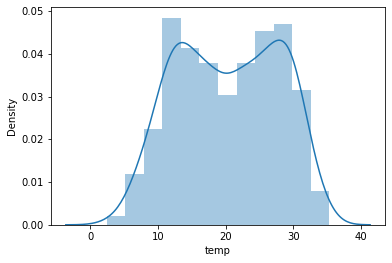

In [32]:
_=sns.distplot(df["temp"])


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


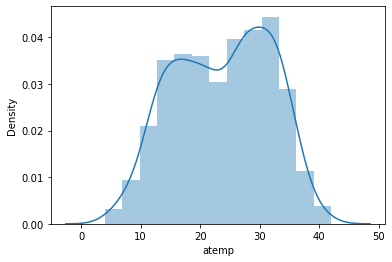

In [33]:
_=sns.distplot(df["atemp"])


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


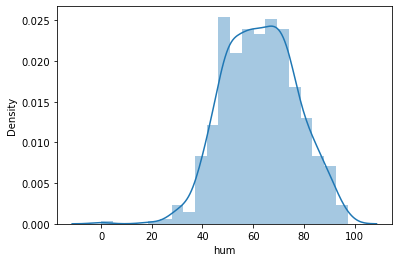

In [34]:
_=sns.distplot(df["hum"])


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


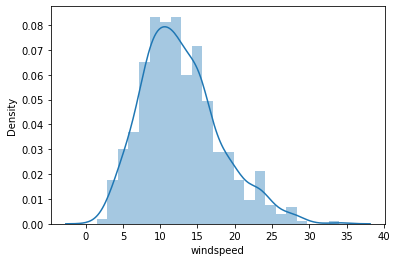

In [35]:
_=sns.distplot(df["windspeed"])


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


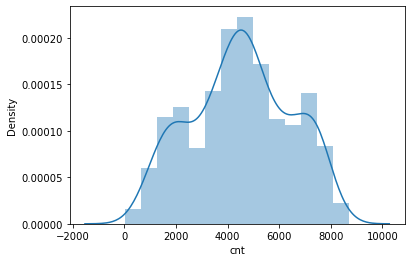

In [36]:
_=sns.distplot(df["cnt"])


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.2+ KB


In [38]:
df["dteday"]=pd.to_datetime(df["dteday"])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

In [40]:
df_categorical=df.select_dtypes('object')

In [41]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [42]:
import matplotlib.pyplot as plt

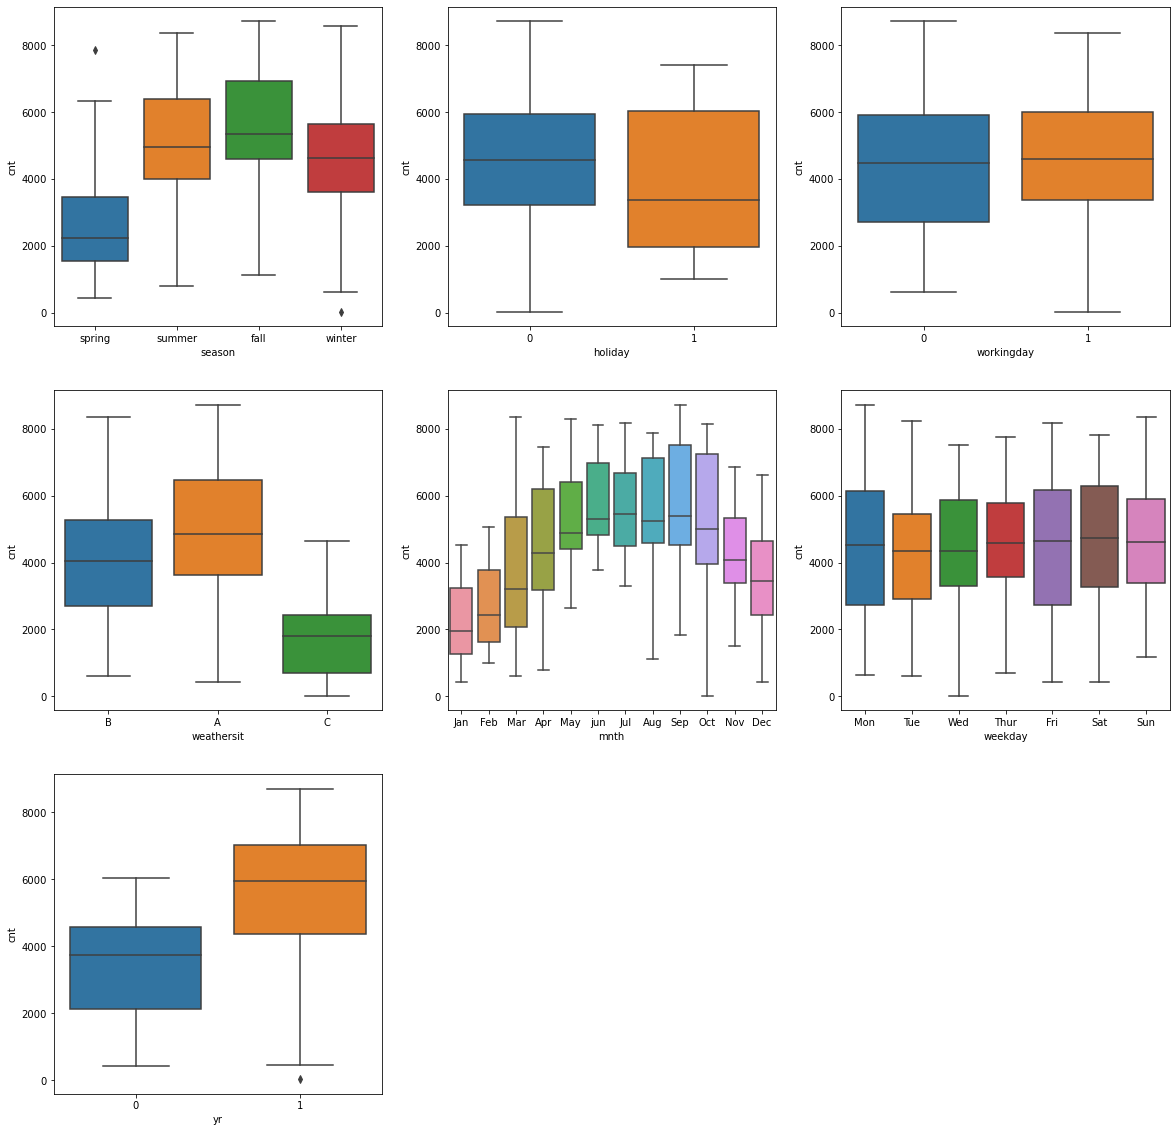

In [43]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x=df["season"],y=df["cnt"])
plt.subplot(3,3,2)
sns.boxplot(x="holiday",y="cnt",data=df)
plt.subplot(3,3,3)
sns.boxplot(x="workingday",y="cnt",data=df)
plt.subplot(3,3,4)
sns.boxplot(x="weathersit",y="cnt",data=df)
plt.subplot(3,3,5)
sns.boxplot(x="mnth",y="cnt",data=df)
plt.subplot(3,3,6)
sns.boxplot(x="weekday",y="cnt",data=df)
plt.subplot(3,3,7)
sns.boxplot(x="yr",y="cnt",data=df)
plt.show()

# Data Preparation

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 111.2+

In [45]:
df_numeric=df.select_dtypes(include=["float64","int64"])

In [46]:
df_numeric.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [47]:
df_numeric.drop(["yr","holiday","workingday"],axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,985
2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [48]:
import numpy as np

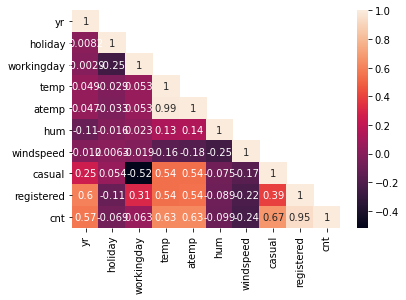

In [49]:
mask=np.array(df_numeric.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(df_numeric.corr(),mask=mask,annot=True)
plt.show()

In [50]:
df.drop(["atemp"],axis=1,inplace=True)

In [51]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 82.7 KB


In [52]:
df_categorical

,season,mnth,weekday,weathersit
instant,,,,
1,spring,Jan,Mon,B
2,spring,Jan,Tue,B
3,spring,Jan,Wed,A
4,spring,Jan,Thur,A
5,spring,Jan,Fri,A
...,...,...,...,...
726,spring,Dec,Sat,B
727,spring,Dec,Sun,B
728,spring,Dec,Mon,B


In [53]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True)

In [54]:
df_dummies

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Mar,mnth_May,...,mnth_Sep,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [55]:
list(df_categorical.columns)

['season', 'mnth', 'weekday', 'weathersit']

In [56]:
df=df.drop(list(df_categorical.columns),axis=1)

In [57]:
df=pd.concat([df,df_dummies],axis=1)

In [58]:
df.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_Sep,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [59]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   hum            730 non-null    float64       
 6   windspeed      730 non-null    float64       
 7   casual         730 non-null    int64         
 8   registered     730 non-null    int64         
 9   cnt            730 non-null    int64         
 10  season_spring  730 non-null    uint8         
 11  season_summer  730 non-null    uint8         
 12  season_winter  730 non-null    uint8         
 13  mnth_Aug       730 non-null    uint8         
 14  mnth_Dec       730 non-null    uint8         
 15  mnth_Feb       730 non-

In [60]:
df.drop(["dteday"],axis=1,inplace=True)

In [61]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Sep,mnth_jun,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


# Data Framing

In [62]:
X=df.drop("cnt",axis=1)
y=df["cnt"]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler=MinMaxScaler()

In [67]:
X_train[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(X_train[["temp","hum","windspeed","casual","registered"]])

<ipython-input-67-c059ef7b622c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(X_train[["temp","hum","windspeed","casual","registered"]])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [68]:
X_test[["temp","hum","windspeed","casual","registered"]]=scaler.transform(X_test[["temp","hum","windspeed","casual","registered"]])

<ipython-input-68-ffddefaac95f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[["temp","hum","windspeed","casual","registered"]]=scaler.transform(X_test[["temp","hum","windspeed","casual","registered"]])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
model=GradientBoostingRegressor()

In [71]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [72]:
model.score(X_test,y_test)

0.9955493678802092

In [73]:
model.score(X_train,y_train)

0.99902233796698